In [4]:
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

In [9]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'IV at base'
offset_name = 'offset'
sweep_name = 'sweep'
i = 10

try:
    while True:
        gw.adwin.setAveraging(50)
        gw.femtos.set_amplification_A(100)
        gw.femtos.set_amplification_B(1000)
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        m = gw.measure(f"{name}/{i:07d}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        for j in range(5):
            gw.adwin.setAmplitude(8)
            gw.adwin.setFrequency(0.053)
            gw.adwin.setLockinAmplitude(.1)
            gw.adwin.setLockinFrequency(73.3)
            m = gw.measure(f"{name}/{i:07d}/{sweep_name}_{j}")
            
            sleep(.5)
            m.start()
            gw.adwin.setSweeping(True)
            sleep(20)
            m.stop()

            sleep(1)
            gw.adwin.setSweeping(False)

        i+=1
except KeyboardInterrupt:
    try:
        m.stop()
    except:
        pass

In [3]:
from datetime import datetime
import numpy as np
timestamp = 1683599443.2752402

dt_object = datetime.fromtimestamp(timestamp)
print(dt_object)

2023-05-09 04:30:43.275240


In [10]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'IV at base'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)
gw.adwin.setAmplitude(0)
gw.adwin.setSweeping(False)
m = gw.measure(f"{name}/{offset_name}")
sleep(.5)
m.start()
sleep(3)
m.stop()

gw.adwin.setAmplitude(8)
gw.adwin.setFrequency(0.053)
gw.adwin.setLockinAmplitude(.1)
gw.adwin.setLockinFrequency(73.3)
m = gw.measure(f"{name}/{sweep_name}_{j}")

sleep(.5)
m.start()
gw.adwin.setSweeping(True)
sleep(100)
m.stop()

sleep(1)
gw.adwin.setSweeping(False)

-4.121252697599132e-05 0.11136608186660259


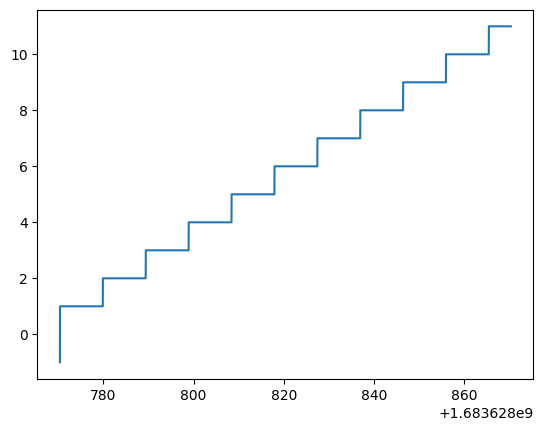

In [83]:
from p5control import InstrumentGateway, DataGateway

dgw = DataGateway()
dgw.connect()

offset = dgw.get_data(f"/measurement/{name}/{offset_name}/adwin")
sweep = dgw.get_data(f"/measurement/{name}/{sweep_name}_1/adwin")

import matplotlib.pyplot as plt

off_V1 = np.mean(offset['V1'])
off_V2 = np.mean(offset['V2'])

t = sweep['time']

V1 = sweep['V1'] - off_V1
V2 = sweep['V2'] - off_V2

voltage = V1 / 1000 #FemtoB [V]
current = V2 / 100 * 100 / 47000 # FemtoA, VD, R_ref [A]

trigger = sweep['trigger']

plt.plot(t, trigger)

new_trig = np.copy(trigger)
new_time = np.copy(t)

new_trig = np.array(new_trig, dtype='float64')
new_trig[new_trig<1] = np.nan
new_trig = new_trig%2

new_trig = np.abs(new_trig[1:]-new_trig[:-1])
new_time = t[1:]

logic = new_trig==0
new_trig[logic] = np.nan
new_time[logic] = np.nan

new_trig = new_trig[~np.isnan(new_trig)]
new_time = new_time[~np.isnan(new_time)]

print(off_V1, off_V2)



(1683628760.0, 1683628990.0)

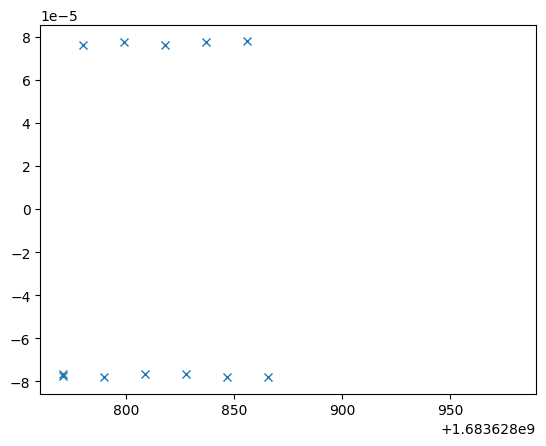

In [113]:
plt.plot(t, current,'x')
plt.xlim(1.68362876e+09,1.68362899e+09)
#plt.plot(voltage, current, '.')
#plt.plot(t, trigger)
# plt.plot(new_time[:], new_time/new_time, 'x')

In [1]:
#plt.plot(sweep['V1'],'.')
#plt.plot(V1,'.')
#plt.plot(voltage,'.')
plt.plot(current/voltage, voltage, '.')
plt.grid(True)

NameError: name 'plt' is not defined

# Magnetfeldabhängige Messungen

In [2]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

gw.magnet.goto_zero()

In [111]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

uH_soll = 1
name = 'test'
field_name = f'uH={uH_soll*1000:+.2f}mT'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(3)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)
gw.adwin.setAmplitude(0)
gw.adwin.setSweeping(False)
m = gw.measure(f"{name}/{field_name}/{offset_name}")
sleep(.5)
m.start()
sleep(3)
m.stop()

gw.adwin.setAmplitude(0.25)
gw.adwin.setFrequency(0.053)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)
m = gw.measure(f"{name}/{field_name}/{sweep_name}")

sleep(.5)
m.start()
gw.adwin.setSweeping(True)
sleep(100)
m.stop()

sleep(1)
gw.adwin.setSweeping(False)

In [110]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

uH_range = np.linspace(-0.025, 0.025, 201)

gw.magnet.set_rate(0)

for i, uH_soll in enumerate(tqdm(uH_range)):
    # gw.magnet.set_target_field(uH_soll)
    # gw.magnet.ramp()
    # sleep(10)

    # do IV sweep

    
    field = f'uH={uH_soll*1000:+.2f}mT'



100%|██████████| 201/201 [00:00<00:00, 201495.01it/s]

uH=-25.00mT
uH=-24.75mT
uH=-24.50mT
uH=-24.25mT
uH=-24.00mT
uH=-23.75mT
uH=-23.50mT
uH=-23.25mT
uH=-23.00mT
uH=-22.75mT
uH=-22.50mT
uH=-22.25mT
uH=-22.00mT
uH=-21.75mT
uH=-21.50mT
uH=-21.25mT
uH=-21.00mT
uH=-20.75mT
uH=-20.50mT
uH=-20.25mT
uH=-20.00mT
uH=-19.75mT
uH=-19.50mT
uH=-19.25mT
uH=-19.00mT
uH=-18.75mT
uH=-18.50mT
uH=-18.25mT
uH=-18.00mT
uH=-17.75mT
uH=-17.50mT
uH=-17.25mT
uH=-17.00mT
uH=-16.75mT
uH=-16.50mT
uH=-16.25mT
uH=-16.00mT
uH=-15.75mT
uH=-15.50mT
uH=-15.25mT
uH=-15.00mT
uH=-14.75mT
uH=-14.50mT
uH=-14.25mT
uH=-14.00mT
uH=-13.75mT
uH=-13.50mT
uH=-13.25mT
uH=-13.00mT
uH=-12.75mT
uH=-12.50mT
uH=-12.25mT
uH=-12.00mT
uH=-11.75mT
uH=-11.50mT
uH=-11.25mT
uH=-11.00mT
uH=-10.75mT
uH=-10.50mT
uH=-10.25mT
uH=-10.00mT
uH=-9.75mT
uH=-9.50mT
uH=-9.25mT
uH=-9.00mT
uH=-8.75mT
uH=-8.50mT
uH=-8.25mT
uH=-8.00mT
uH=-7.75mT
uH=-7.50mT
uH=-7.25mT
uH=-7.00mT
uH=-6.75mT
uH=-6.50mT
uH=-6.25mT
uH=-6.00mT
uH=-5.75mT
uH=-5.50mT
uH=-5.25mT
uH=-5.00mT
uH=-4.75mT
uH=-4.50mT
uH=-4.25mT
uH=-4.00mT
uH=-

In [6]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

import numpy as np
from tqdm import tqdm

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'critical field'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(3)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)
gw.adwin.setAmplitude(0)
gw.adwin.setSweeping(False)

gw.magnet.set_rate(0)

uH_range = np.linspace(-0.025, 0.025, 201)
for i, uH_soll in enumerate(tqdm(uH_range)):

    field_name = f'uH={uH_soll*1000:+.2f}mT'
    gw.magnet.set_target_field(uH_soll)
    gw.magnet.ramp()
    sleep(20)

    # do IV sweep  
    gw.adwin.setAmplitude(0)
    gw.adwin.setSweeping(False)
    m = gw.measure(f"{name}/{field_name}/{offset_name}")
    sleep(.5)
    m.start()
    sleep(3)
    m.stop()

    gw.adwin.setAmplitude(0.25)
    gw.adwin.setFrequency(0.053)
    gw.adwin.setLockinAmplitude(0)
    gw.adwin.setLockinFrequency(73.3)
    m = gw.measure(f"{name}/{field_name}/{sweep_name}")

    sleep(.5)
    m.start()
    gw.adwin.setSweeping(True)
    sleep(100)
    m.stop()
    
    gw.adwin.setAmplitude(0)
    gw.adwin.setSweeping(False)

100%|██████████| 201/201 [7:11:18<00:00, 128.75s/it]  


In [2]:
m.stop()

NameError: name 'm' is not defined

In [8]:
gw.magnet.set_target_field(0)
gw.magnet.ramp()

# Temperaturabhängige Messung

In [2]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'test'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(10000)
gw.femtos.set_amplification_B(10)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setLockinFrequency(73.3)
gw.adwin.setFrequency(0.053)

i = 0
try: 
    while True:
        i +=1
        subname = f'm{i:06d}'
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        m = gw.measure(f"{name}/{subname}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        gw.adwin.setAmplitude(0.25)
        m = gw.measure(f"{name}/{subname}/{sweep_name}")

        sleep(.5)
        m.start()
        gw.adwin.setSweeping(True)
        sleep(20)
        m.stop()

        sleep(1)
        gw.adwin.setSweeping(False)

except KeyboardInterrupt:
    m.stop()

In [13]:
from p5control import InstrumentGateway, DataGateway
from time import sleep

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'test'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(10000)
gw.femtos.set_amplification_B(10)
gw.adwin.setLockinAmplitude(0)
gw.adwin.setAmplitude(0)

In [12]:
gw.adwin.setAmplitude(.025)